In [4]:
# !pip install librosa
# !pip install matplotlib
# !pip install seaborn

In [5]:
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
import numpy as np
# import librosa

In [6]:
sample, fs = sf.read('./TinHieuHuanLuyen/studio_M2.wav', dtype="float32")
start = float(input())
end = float(input())
if end != 0:
    data = sample[round(start * fs): round(end * fs)]
else:
    data = sample[:round(start * fs)]
data

array([-0.00140381, -0.00143433, -0.00125122, ..., -0.00286865,
       -0.00262451, -0.00204468], dtype=float32)

In [7]:
print(len(data))
print(fs)

65268
44100


In [8]:
frames=[]
def SSD(data, fs, t):
    fsize = round(t * fs)
    fcount = floor(len(data)/fsize)
    begin=0
    for i in range(0, fcount):
        frames.append(data[begin:begin+fsize])
        begin=begin+fsize

In [9]:
frames=[]
SSD(data, fs, 0.02)
frames

[array([-1.40380859e-03, -1.43432617e-03, -1.25122070e-03, -1.00708008e-03,
        -8.85009766e-04, -9.46044922e-04, -1.06811523e-03, -1.12915039e-03,
        -1.06811523e-03, -1.00708008e-03, -1.09863281e-03, -1.34277344e-03,
        -1.52587891e-03, -1.58691406e-03, -1.40380859e-03, -1.09863281e-03,
        -9.46044922e-04, -9.46044922e-04, -9.76562500e-04, -9.46044922e-04,
        -7.32421875e-04, -4.27246094e-04, -2.74658203e-04, -3.05175781e-04,
        -4.27246094e-04, -5.18798828e-04, -4.57763672e-04, -3.05175781e-04,
        -2.44140625e-04, -3.96728516e-04, -6.10351562e-04, -7.93457031e-04,
        -7.62939453e-04, -5.18798828e-04, -2.74658203e-04, -1.83105469e-04,
        -1.83105469e-04, -1.83105469e-04, -1.22070312e-04,  0.00000000e+00,
         3.05175781e-05, -1.52587891e-04, -4.27246094e-04, -6.71386719e-04,
        -7.32421875e-04, -6.10351562e-04, -5.18798828e-04, -5.49316406e-04,
        -7.01904297e-04, -8.54492188e-04, -7.32421875e-04, -4.57763672e-04,
        -1.8

In [10]:
def ACF(frame):
    acf = np.zeros(len(frame))
    for i in range(len(frame)):
        for j in range(len(frame)-i):
            acf[i] = acf[i] + frame[j]*frame[j+i]
    return acf

In [21]:
acf1 = ACF(frames[40])
acf_max = np.max(acf1)
acf1 = acf1/acf_max
acf1

array([ 1.00000000e+00,  9.97609840e-01,  9.94648357e-01,  9.91215019e-01,
        9.87351851e-01,  9.83020717e-01,  9.78178145e-01,  9.72815630e-01,
        9.66944653e-01,  9.60594633e-01,  9.53800992e-01,  9.46579337e-01,
        9.38936246e-01,  9.30891922e-01,  9.22458784e-01,  9.13635067e-01,
        9.04417926e-01,  8.94808247e-01,  8.84812173e-01,  8.74440426e-01,
        8.63709800e-01,  8.52630382e-01,  8.41207868e-01,  8.29451153e-01,
        8.17381535e-01,  8.04999988e-01,  7.92310057e-01,  7.79353769e-01,
        7.66158357e-01,  7.52706353e-01,  7.38968588e-01,  7.24936222e-01,
        7.10643810e-01,  6.96142338e-01,  6.81445873e-01,  6.66552126e-01,
        6.51473873e-01,  6.36239279e-01,  6.20848393e-01,  6.05278440e-01,
        5.89539373e-01,  5.73665890e-01,  5.57682982e-01,  5.41615930e-01,
        5.25500324e-01,  5.09351424e-01,  4.93152533e-01,  4.76892460e-01,
        4.60571411e-01,  4.44204725e-01,  4.27803397e-01,  4.11380642e-01,
        3.94969293e-01,  

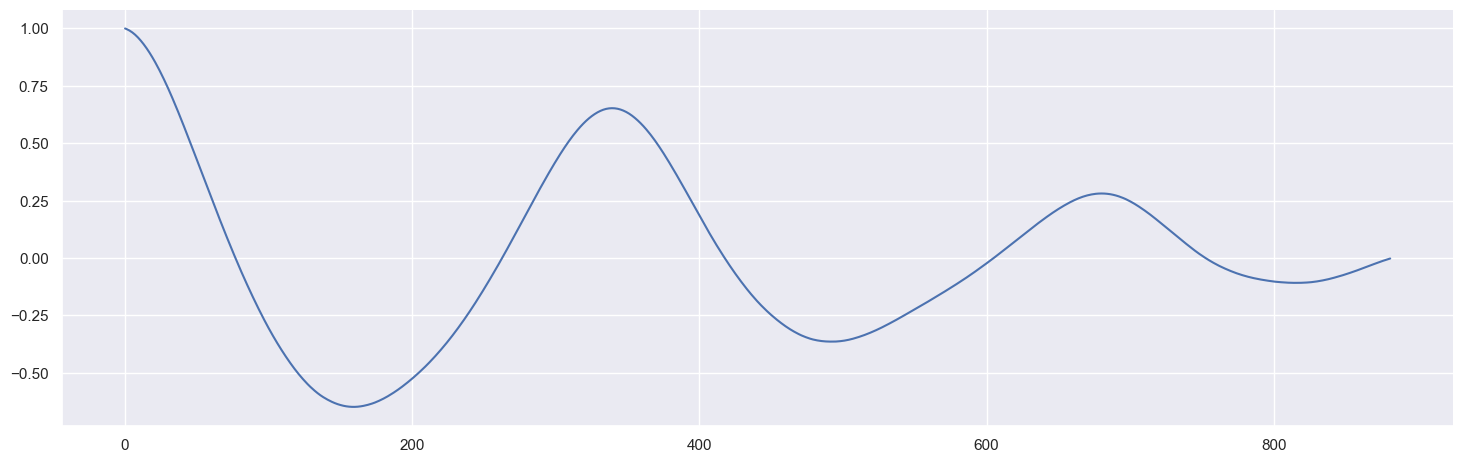

In [22]:
sns.set_theme()
sns.relplot(data=acf1,kind="line", aspect=3).set_titles("Voiced")
plt.show()

In [13]:
acf2 = ACF(frames[50])
acf_max = np.max(acf2)
acf2 = acf2/acf_max
acf2

array([ 1.00000000e+00,  9.97893337e-01,  9.92537501e-01,  9.85133196e-01,
        9.76309027e-01,  9.66098388e-01,  9.54307422e-01,  9.41116170e-01,
        9.26937817e-01,  9.11913011e-01,  8.95705260e-01,  8.77682690e-01,
        8.57526635e-01,  8.35648527e-01,  8.12736041e-01,  7.89159737e-01,
        7.64856737e-01,  7.39597569e-01,  7.13455590e-01,  6.86755801e-01,
        6.59730404e-01,  6.32316893e-01,  6.04321680e-01,  5.75841477e-01,
        5.47394396e-01,  5.19517897e-01,  4.92348886e-01,  4.65705774e-01,
        4.39334963e-01,  4.13092805e-01,  3.86940784e-01,  3.60882170e-01,
        3.34904662e-01,  3.09041824e-01,  2.83502201e-01,  2.58701000e-01,
        2.35057371e-01,  2.12662091e-01,  1.91251115e-01,  1.70526265e-01,
        1.50287957e-01,  1.30397564e-01,  1.10737385e-01,  9.12515165e-02,
        7.20763624e-02,  5.35014418e-02,  3.58086921e-02,  1.91622483e-02,
        3.53677077e-03, -1.12202503e-02, -2.52626388e-02, -3.86891250e-02,
       -5.15821978e-02, -

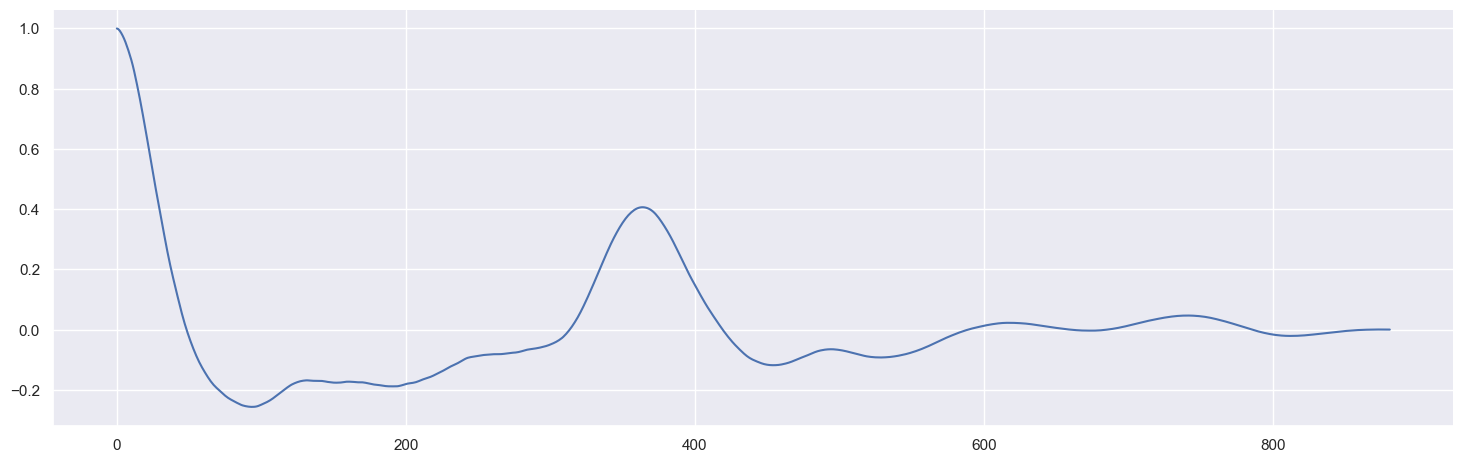

In [14]:
sns.set_theme()
sns.relplot(data=acf2,kind="line", aspect=3)
plt.show()

In [15]:
F0=0
isVoiced=False
def mainFunction(acf, fs):
    threshold = 0.3
    fmin=70
    fmax=400
    peakIndex=[]
    peakValue=[]
    for i in range(1, len(acf) - 1):
        if acf[i] > acf[i - 1] and acf[i] > acf[i + 1]:
            peakIndex.append(i)
            peakValue.append(acf[i])
    maxValue = max(peakValue)
    maxIndex = peakValue.index(maxValue)
    lag=peakIndex[maxIndex]
    localMax=max(peakValue)
    F0 = fs/lag
    if localMax > threshold and F0 > fmin and F0 < fmax:
        isVoiced = True
    else:
        isVoiced = False
    return isVoiced, F0

F=[]
voiced=[]
unvoiced=[]
Ftime=[]
for i in range(0, len(frames)):
    acf=ACF(frames[i])
    acf_max = max(acf)
    acf = acf/acf_max
    isVoiced, F0 = mainFunction(acf, fs)
    if isVoiced:
        F.append(F0)
        voiced.append(acf)
    else:
        F.append(0)
        voiced.append(acf)

for i in range(0, len(F)):
    Ftime.append(i*0.025)

len(F)

74

In [16]:
mean = np.mean(F)
std = np.std(F)

print(mean)
print(std)

129.20888322891463
67.16765527746202


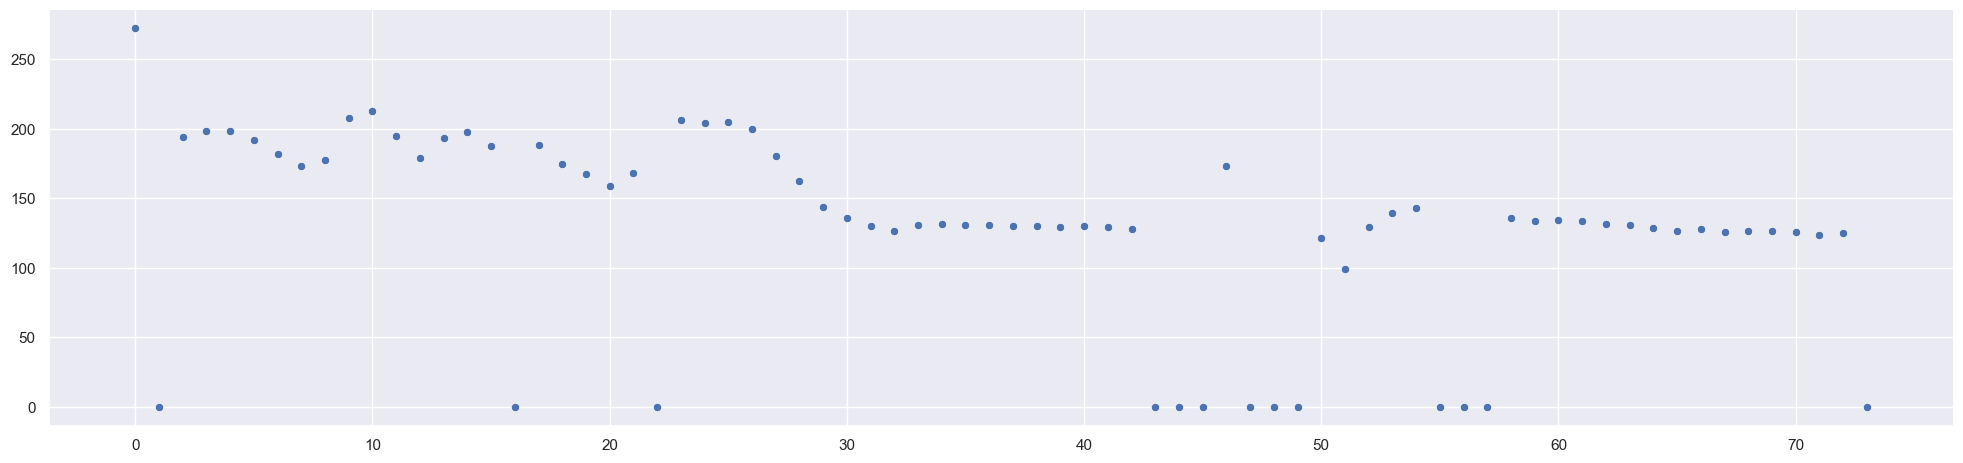

In [23]:
sns.relplot(data=F, aspect=4)

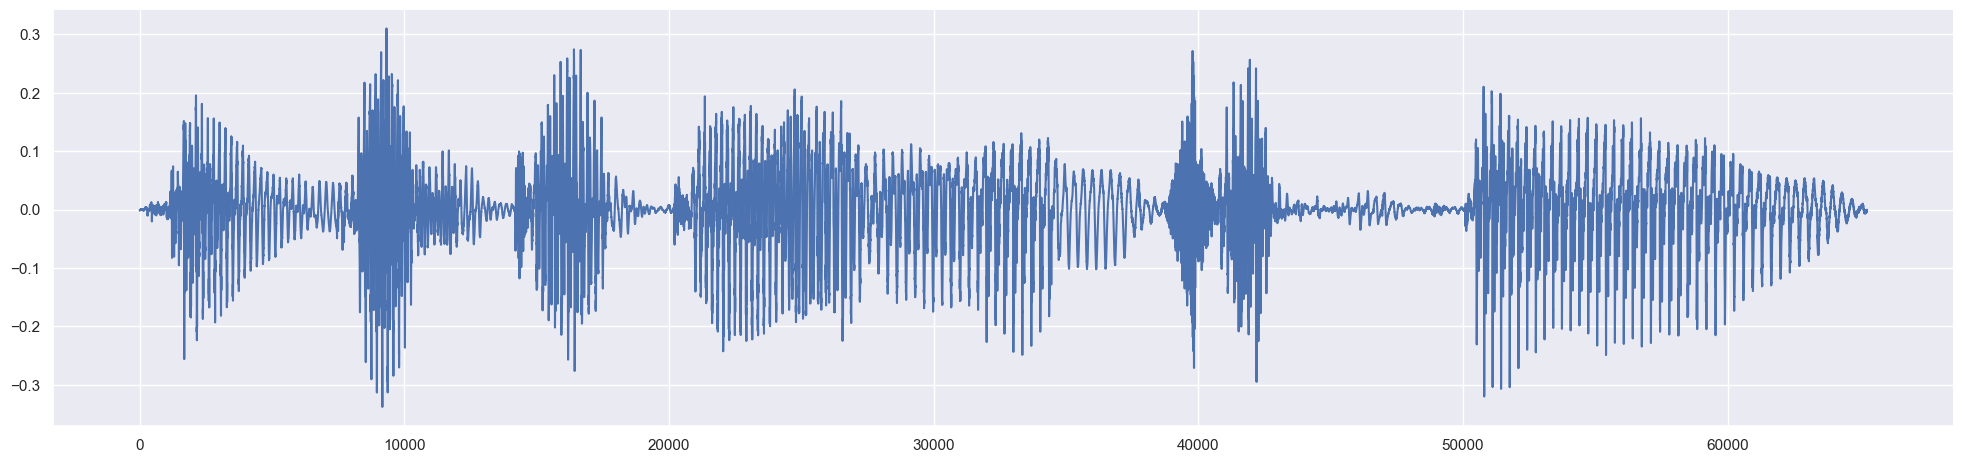

In [24]:
sns.relplot(data=data, kind="line", aspect=4)

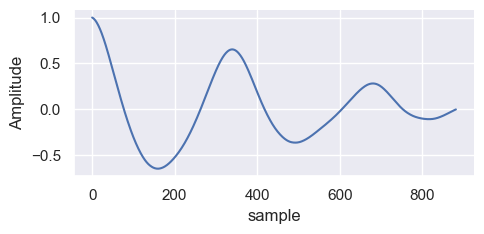

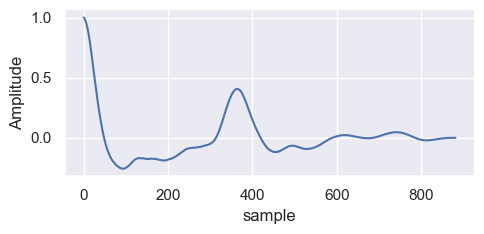

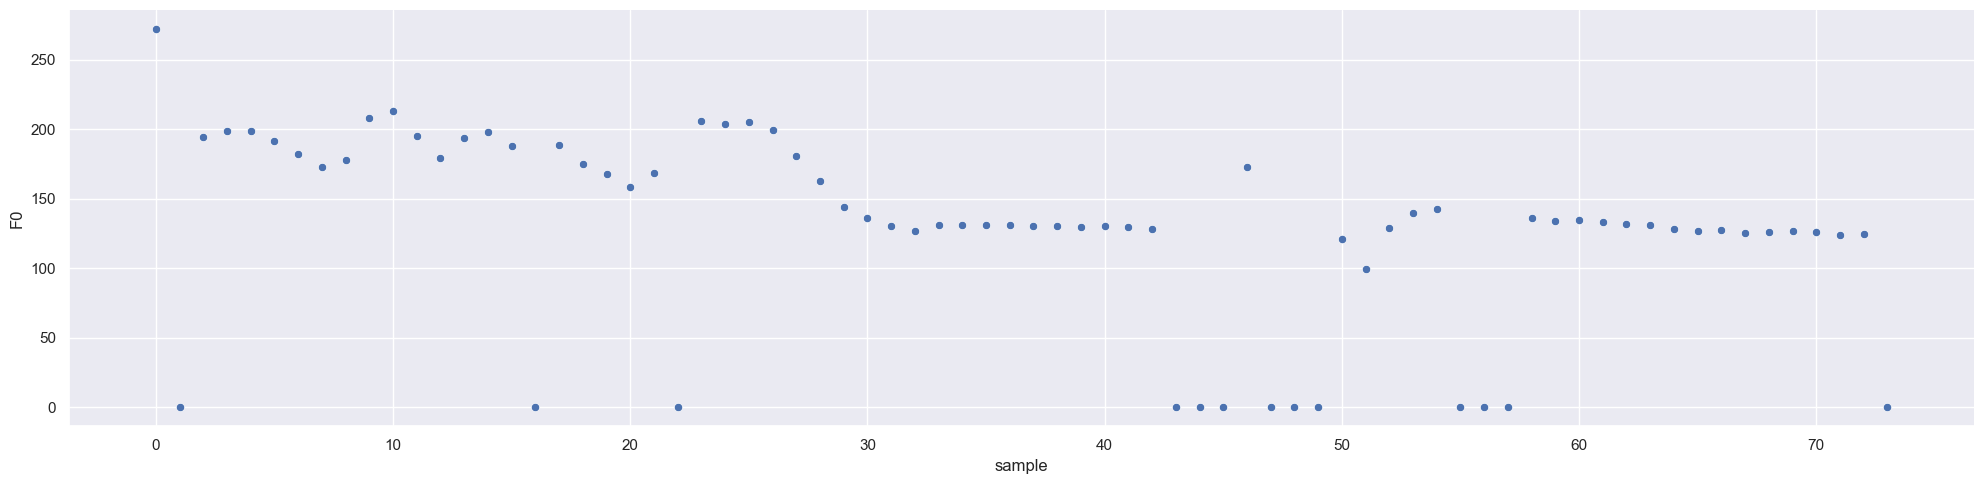

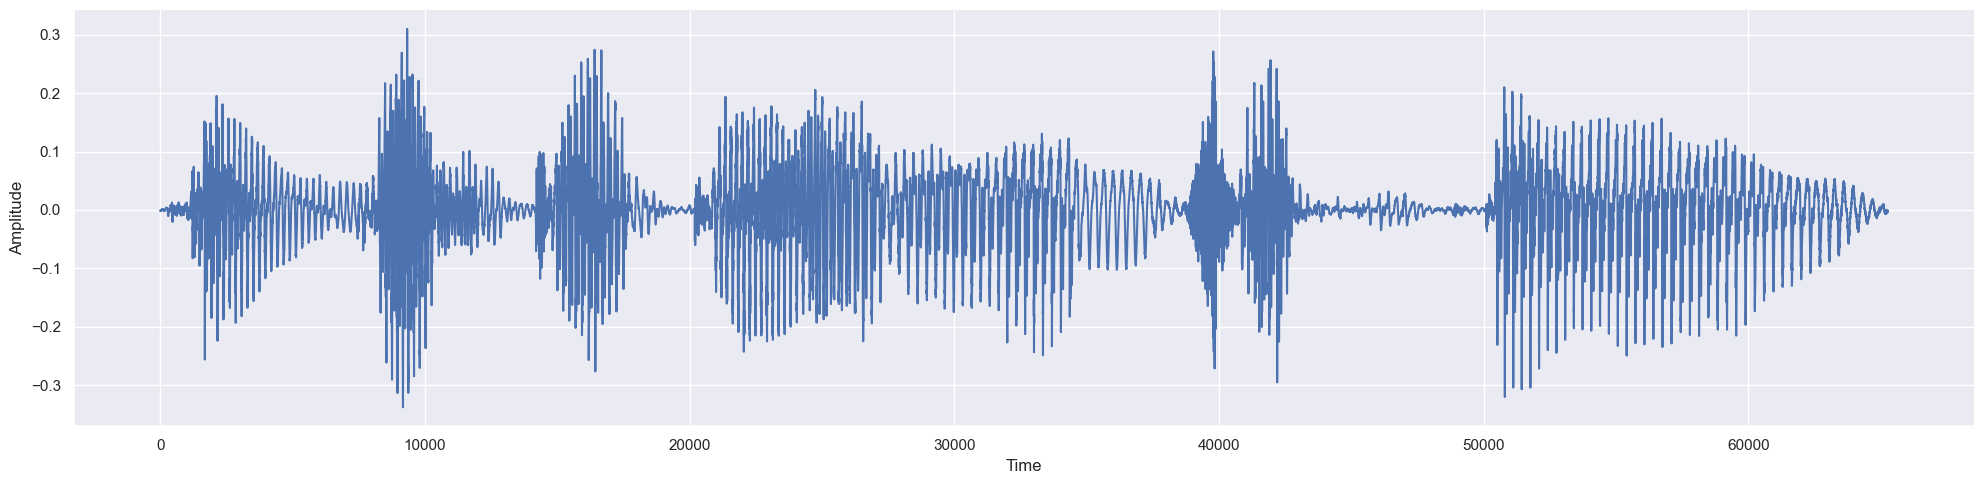

In [25]:
sns.relplot(data=acf1, kind="line", height=2.5, aspect=2).set_xlabels("sample").set_ylabels("Amplitude")
sns.relplot(data=acf2, kind="line", height=2.5, aspect=2).set_xlabels("sample").set_ylabels("Amplitude")
sns.relplot(data=F, aspect=4).set_xlabels("sample").set_ylabels("F0")
sns.relplot(data=data, kind="line", a spect=4).set_xlabels("Time").set_ylabels("Amplitude")
plt.show()

In [20]:
ls=[]
ls.append(0)
ls.append(0)
ls

[0, 0]